In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# Partie 1 : Calcul et remplissage de contour



## Création/Lecture d'images

In [2]:
image1 = np.zeros((10,10))
for i in range(3,7):
    for j in range (3,7):
        image1[i,j] = 1
for i in range(2,8):
    for j in range (4,6):
        image1[i,j] = 1
for i in range(4,6):
    for j in range (2,8):
        image1[i,j] = 1

In [3]:
image2 = np.zeros((13,13))
for i in range(3,10):
    for j in range (3,10):
        image2[i,j] = 1

In [4]:
def lit_bpm(nom):
    fichier = open(nom, 'r')
    tab = []
    n = 0
    liste2 = np.array([])
    for ligne in fichier :
        n+=1
        liste = ligne[:-1].split(' ')
        if n == 3:
            shape0, shape1 = int(liste[0]), int(liste[1])
        if n>=4:
            liste = liste[:-1]
            for element in liste :
                liste2 = np.append(liste2,int(element))
    liste2 = np.reshape(liste2,(shape0,shape1))
    return liste2


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

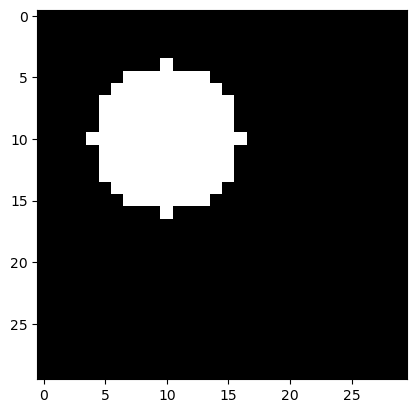

In [5]:
image3 = lit_bpm('image.pbm')
# print(image3)
plt.imshow(image3,cmap='gray', vmin = 0, vmax = 1)

In [6]:
# pour l'application de l'enveloppe convexe

n,m = np.shape(image3)
dico3 = {}
for i in range(n):
    for j in range(m):
        if image3[i,j]==1:
            dico3[(i,j)]=1
print(dico3.keys())

dict_keys([(4, 10), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (11, 15), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (15, 7), (15, 8), (15, 9), (15, 10),

In [7]:
image4 = 128*np.ones((30,30))

In [8]:
# plt.imshow(image4,cmap='gray', vmin = 0, vmax = 255)

In [9]:
image5 = 128*np.ones((10,10))

In [10]:
# plt.imshow(image5,cmap='gray', vmin = 0, vmax = 255)

In [11]:
image6 = cv2.imread("lion.jpeg")

## Contour d'un objet

### Point de départ du contour

In [12]:
def trouver_point_depart(image):
    nb_lignes, nb_colonnes = np.shape(image)
    for i in range(nb_lignes):
        for j in range(nb_colonnes):
            if image[i,j] == 1 :
                return i,j

In [13]:
# trouver_point_depart(image1)
# #(2,4) OK

In [14]:
# trouver_point_depart(image2)
# #(3,3) OK

In [15]:
# trouver_point_depart(image3)
# # (4, 10) OK

### Contour

In [16]:
def trouver_chemin(image):

    departl,departc = trouver_point_depart(image)

    Pl,Pc = departl,departc
    Ql,Qc = Pl-1,Pc

    contour = np.array([]) # initialisation contour
    n = 0  #condition d'arret
    i = 0
    while n<=0:
        i+=1
        # definir S et R
        if Ql == Pl-1 :
            Rl,Rc = Pl-1,Pc+1
            Sl,Sc = Ql+1,Qc+1
        if Qc == Pc+1 :
            Rl,Rc = Pl+1,Pc+1
            Sl,Sc = Ql+1,Qc-1
        if Ql == Pl+1 :
            Rl,Rc = Pl+1,Pc-1
            Sl,Sc = Ql-1,Qc-1
        if Qc == Pc-1 :
            Rl,Rc = Pl-1,Pc-1
            Sl,Sc = Ql-1,Qc+1

        # definir P et Q
        if image[Rl,Rc] == 1:
            contour = np.append(contour, [Rl-Ql,Rc-Qc]) # mise à jour C
            Pl_new, Pc_new = Rl,Rc
            Pl,Pc = Pl_new, Pc_new # implémentation de P

        else :
            contour = np.append(contour, [Sl-Pl,Sc-Pc]) # mise à jour C
            if image[Sl,Sc] == 1 :
                Pl_new, Pc_new = Sl,Sc
                Ql_new, Qc_new = Rl,Rc
                Pl,Pc = Pl_new, Pc_new # implémentation de P
                Ql,Qc = Ql_new, Qc_new #implémentation de Q

            else :
                Ql_new, Qc_new = Sl,Sc
                Ql,Qc = Ql_new, Qc_new #implémentation de Q

        if Pl == departl and Pc == departc and i>=np.shape(image)[0]: # implémentation condition d'arret
            n=1

    # dernier vecteur (pas pris en compte dans la boucle)
    if Ql == Pl-1 :
        Rl,Rc = Pl-1,Pc+1
        Sl,Sc = Ql+1,Qc+1
    if Qc == Pc+1 :
        Rl,Rc = Pl+1,Pc+1
        Sl,Sc = Ql+1,Qc-1
    if Ql == Pl+1 :
        Rl,Rc = Pl+1,Pc-1
        Sl,Sc = Ql-1,Qc-1
    if Qc == Pc-1 :
        Rl,Rc = Pl-1,Pc-1
        Sl,Sc = Ql-1,Qc+1

    if image[Rl,Rc] == 1:
        contour = np.append(contour, [Rl-Ql,Rc-Qc])
    else :
        contour = np.append(contour, [Sl-Pl,Sc-Pc])

    # reshape du tableau
    n = len(contour)
    tp = np.array([contour[i] for i in range (0,n,2)])
    ti = np.array([contour[i] for i in range (1,n,2)])
    new_contour = np.zeros((n/2,2))
    for i in range(n/2) :
        new_contour[i] = [tp[i], ti[i]]
        
    return new_contour




In [17]:
# trouver_chemin(image1)
# OK

In [18]:
# trouver_chemin(image2)
# OK

In [19]:
# trouver_chemin(image3) 
# OK

### Affichage du contour

In [20]:
def tracer_chemin(image):
    """
    fonctionne si on remplit les conditions suivantes :
     - objet connexe
     - image en noir et blanc
    """
    
    fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
    ax1.imshow(image,cmap='gray', vmin = 0, vmax = 1)
    ax1.set_title('image')

    P1 = trouver_point_depart(image) + np.array([-0.5,-0.5])
    chemin = trouver_chemin(image)
    n = np.shape(chemin)[0]

    ligne = np.zeros((n+1,2))
    ligne[0] = P1
    for i in range(1,n+1):
        ligne[i] = ligne[i-1]+ chemin[i-1]
    
    ax2.imshow(image,cmap='gray', vmin = 0, vmax = 1)
    ax2.plot(ligne[:,0], ligne[:,1], 'r')
    ax2.set_title('image avec contour')
    plt.show()


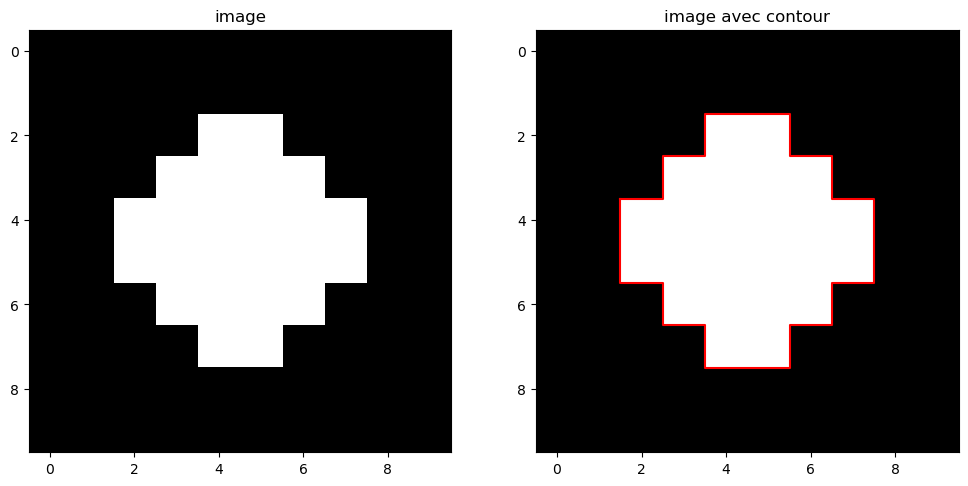

In [21]:
tracer_chemin(image1)

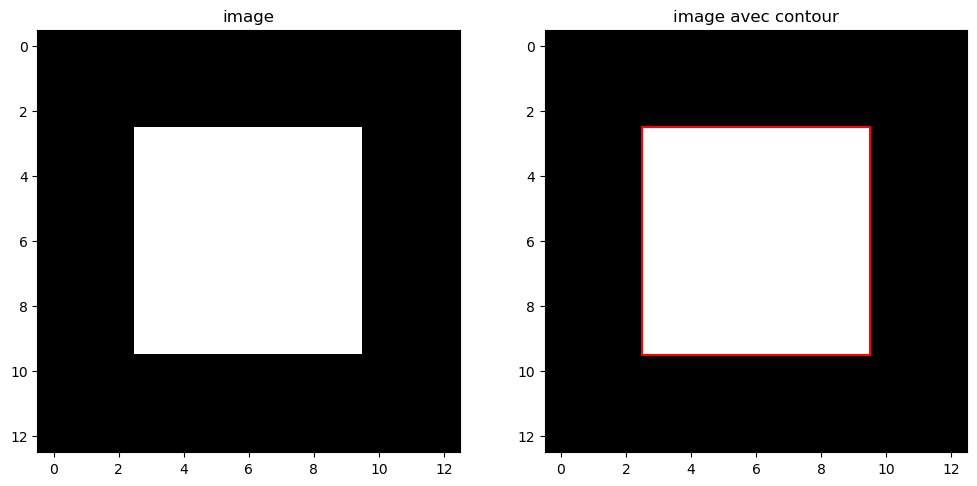

In [22]:
tracer_chemin(image2)

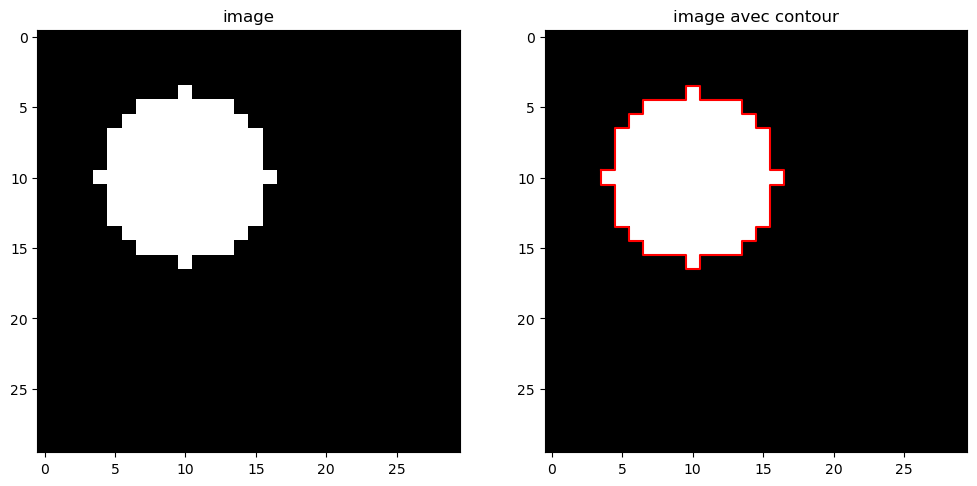

In [23]:
tracer_chemin(image3)

## Filtre de Sobel

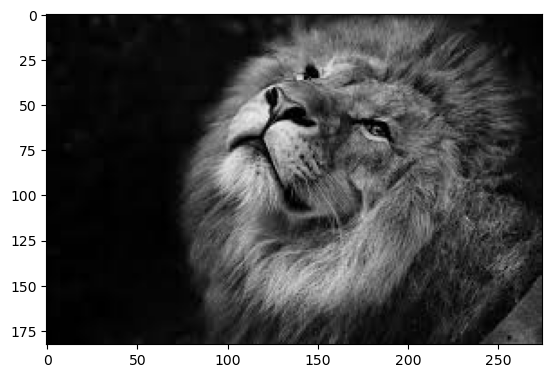

In [24]:
plt.imshow(image6, cmap = "gray")

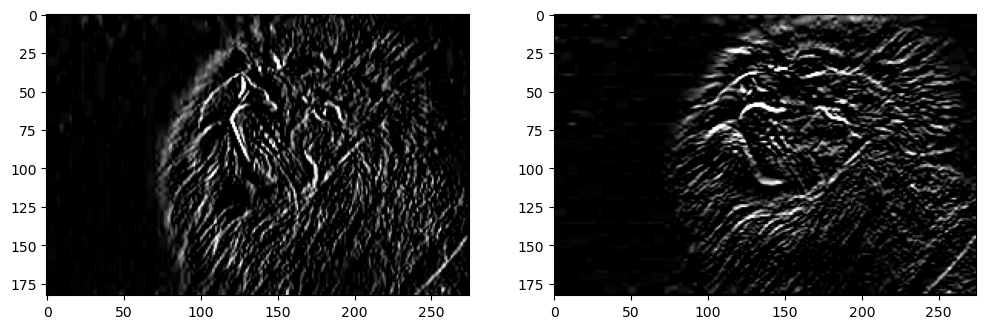

In [25]:
derivX = cv2.Sobel(image6,ddepth=int(-1),dx=int(1),dy=int(0))
derivY = cv2.Sobel(image6,ddepth=int(-1),dx=int(0),dy=int(1))

fig,(ax1,ax2)=plt.subplots(1,2, figsize = (12,6))
ax1.imshow(derivX,cmap="gray")
ax2.imshow(derivY,cmap="gray")

Text(0.5, 1.0, 'application du filtre de Sobel')

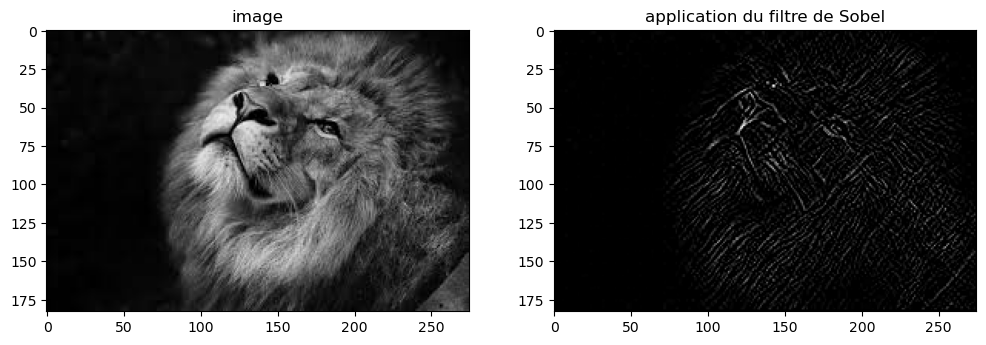

In [26]:
derivXY = cv2.Sobel(image6,ddepth=int(-1),dx=int(1),dy=int(1))

fig,(ax1,ax2)=plt.subplots(1,2, figsize = (12,6))
ax1.imshow(image6, cmap = "gray")
ax1.set_title('image')
ax2.imshow(derivXY,cmap="gray")
ax2.set_title('application du filtre de Sobel')

## Périmètre et aire

In [27]:
def perimetre(image):
    return np.shape(trouver_chemin(image))[0]

In [28]:
def aire(image):
    somme = 0
    a,b = np.shape(image)
    for i in range (a):
        for j in range (b):
            if ima[j,i] == 1 :
                somme +=1
    return somme

## Remplissage de contour

In [29]:
def parcours(image, contour, départ):

    nb_lignes,nb_cols = np.shape(image)
    n = np.shape(contour)[0]

    # points associés au contour
    points_contour = np.zeros((n+1,2))
    points_contour[0] = départ + np.array([-0.5-0.5])
    for i in range(1,n+1):
        points_contour[i] = points_contour[i-1]+contour[i-1]
    
        
    for i in range(n):
        if contour[i][0] == 1 and contour[i][1] == 0 :
            a = points_contour[i] + np.array([0.5,0.5])
            b = points_contour[i] + np.array([0.5,-0.5])
            image[int(a[1]),int(a[0])] = 0
            image[int(b[1]),int(b[0])] = 255
        if contour[i][0] == -1 and contour[i][1] == 0 :
            c = points_contour[i] + np.array([-0.5,-0.5])
            d = points_contour[i] + np.array([-0.5,0.5])
            image[int(c[1]),int(c[0])] = 0
            image[int(d[1]),int(d[0])] = 255
    
    pixel_couleur = 0
    for i in range (nb_cols) :
        for j in range (nb_lignes) :
            if image[j,i] == 0:
                pixel_couleur = 0
            if image[j,i] == 255:
                pixel_couleur = 255
            if image[j,i] == 128:
                if pixel_couleur == 0 :
                    image[j,i] = 0
                if pixel_couleur == 255:
                    image[j,i] = 255
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
    
    ax1.plot(points_contour[:,0]-0.5, points_contour[:,1]-0.5, 'r')
    ax1.imshow(np.zeros_like(image), cmap = 'binary')
    ax1.set_title('contour')
    
    ax2.imshow(image,cmap='gray', vmin = 0, vmax = 255)
    ax2.plot(points_contour[:,0]-0.5, points_contour[:,1]-0.5, 'r')
    ax2.set_title('contour rempli')

    
    plt.show()

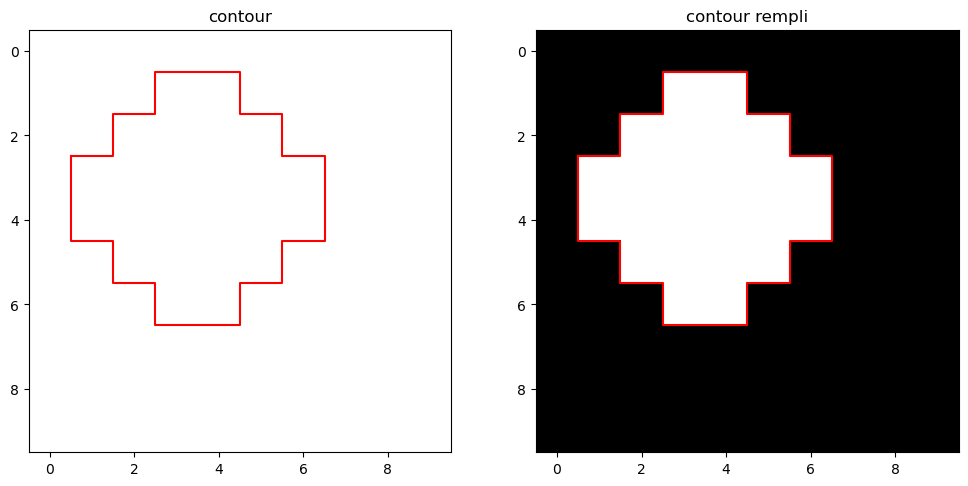

In [30]:
parcours(image5, trouver_chemin(image1), trouver_point_depart(image1))

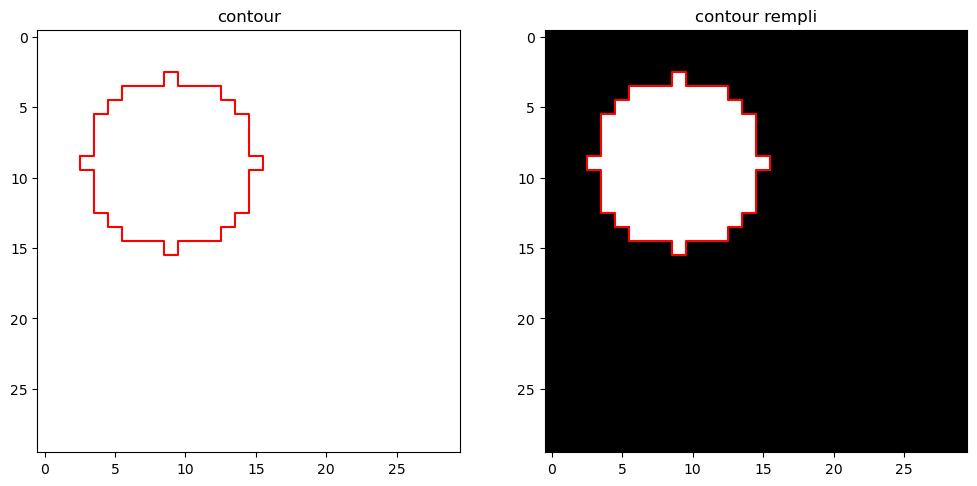

In [31]:
parcours(image4, trouver_chemin(image3), trouver_point_depart(image3))

In [32]:
def distance(a,b):
    return np.sqrt(np.abs(a[0]-b[0])**2 + np.abs(b[1]-a[1])**2)

In [33]:
def angle(pole, x) :
    return math.degrees(np.angle(complex(x[0]-pole[0], x[1]-pole[1])))

In [34]:
n,m = np.shape(image3)
dico32 = {}
for i in range(1,n):
    for j in range(1,m):
        if i != 4 or j != 10 :
            if image3[i,j]==1:
                dico32[(i,j)]= angle((4,10),(i, j) ), distance((4,10),(i, j) )
# print(dico32)
dico_angle2 = dict(sorted(dico32.items(), key=lambda item:item[1][0]))
# print(dico_angle2)

In [35]:
liste_cles = np.array([cle for cle in dico_angle2.keys()])
liste_cles = np.insert(liste_cles, 0, [4,10], axis = 0)
# print(liste_cles)
# print(np.shape(liste_cles))

In [36]:
def graham_v2000(sommets):
    pile = []
    n = np.shape(sommets)[0]
    if n > 3:
        pile.append(list(sommets[0]))
        pile.append(list(sommets[1]))
        pile.append(list(sommets[2]))
        m = len(pile)
        # print(len(pile))
        # print(pile)
        for i in range(3,n-1):
            while m > 2 and :
                pile.pop(-1)
            pile.append(list(sommets[i]))
        return pile

SyntaxError: invalid syntax (4121440120.py, line 12)

In [0]:
graham(liste_cles)